<div align = "center"><font size = "5.5">Novel Density Matrix Encoding - Application - Running Any ML algorithm whose input and ouput data are in matrices form on Quantum Computer (Emulation) </font></div>

In [3]:
# Data Loading and Preprocessing
import pandas as pd

filepath = r"C:\Users\Akshay Patil\Downloads\ml-1m\ml-1m\ratings.csv"
dataframe_1 = pd.read_csv(filepath)
# Print the column names
print(dataframe_1.columns)

Index(['1::1193::5::978300760'], dtype='object')


In [4]:
# Data Preprocessing

# Load the data into a DataFrame
filepath = r"C:\Users\Akshay Patil\Downloads\ml-1m\ml-1m\ratings.csv"
dataframe_1 = pd.read_csv(filepath)

# Splitting the single column into four columns based on the '::' delimiter
split_data = dataframe_1['1::1193::5::978300760'].str.split('::', expand=True)

# Naming the new columns
split_data.columns = ['userId', 'movieId', 'rating', 'Timestamp']

# Displaying the new DataFrame
print(split_data.head())

dataframe_1 = split_data.copy()

  userId movieId rating  Timestamp
0      1     661      3  978302109
1      1     914      3  978301968
2      1    3408      4  978300275
3      1    2355      5  978824291
4      1    1197      3  978302268


In [5]:
# Removing the timestamp column from the DataFrame

dataframe_1 = dataframe_1.drop(dataframe_1.columns[[3]], axis=1)
#df = df.drop(columns=['timestamp'])
print('Input Movie Lens Dataset Dataframe : ')
dataframe_1
# Convert the data column to integers
# Convert the 'userId', 'movieId', and 'rating' columns to integer type
dataframe_1['userId'] = dataframe_1['userId'].astype(int)
dataframe_1['movieId'] = dataframe_1['movieId'].astype(int)
dataframe_1['rating'] = dataframe_1['rating'].astype(int)

# Print the first few rows to verify the changes
print(dataframe_1.head())

Input Movie Lens Dataset Dataframe : 
   userId  movieId  rating
0       1      661       3
1       1      914       3
2       1     3408       4
3       1     2355       5
4       1     1197       3


In [6]:
# Making the DataFrame Square and dimensions as 2^n (n = number of qubits) so that it can be deployable on Quantum Computing Emulations

dataframe_1 = dataframe_1[dataframe_1['movieId'] <= 1024]
dataframe_1 = dataframe_1[dataframe_1['userId'] <= 1024]

In [7]:
# Dividing the Rating Column by 5, Not necessary but easy for further processing...
dataframe_1['rating']/=5
dataframe_1

,userId,movieId,rating
0,1,661,0.6
1,1,914,0.6
7,1,594,0.8
8,1,919,0.8
9,1,595,1.0
...,...,...,...
161022,1024,898,0.6
161023,1024,899,1.0
161028,1024,17,0.8
161029,1024,25,0.8


In [8]:
# Converting the input Dataframe into Sparse Matrix for saving memory of computation, but not required as our dimension size is
# 512 x 512, which can be easily computed on any hardware.
from scipy import sparse
# Creating a sparse matrix
dataframe_1_sparse_matrix = sparse.csr_matrix((dataframe_1.rating.values, (dataframe_1.movieId.values, dataframe_1.userId.values)))
print('Input User Preference Rating Matrix in Sparse Form:')
print(dataframe_1_sparse_matrix)

Input User Preference Rating Matrix in Sparse Form:
  (1, 1)	1.0
  (1, 6)	0.8
  (1, 8)	0.8
  (1, 9)	1.0
  (1, 10)	1.0
  (1, 18)	0.8
  (1, 19)	1.0
  (1, 21)	0.6
  (1, 23)	0.8
  (1, 26)	0.6
  (1, 28)	0.6
  (1, 34)	1.0
  (1, 36)	1.0
  (1, 38)	1.0
  (1, 44)	1.0
  (1, 45)	0.8
  (1, 48)	0.8
  (1, 49)	1.0
  (1, 51)	1.0
  (1, 56)	1.0
  (1, 60)	0.8
  (1, 65)	1.0
  (1, 68)	0.6
  (1, 73)	0.6
  (1, 75)	1.0
  :	:
  (1023, 1000)	1.0
  (1023, 1004)	0.8
  (1023, 1024)	0.2
  (1024, 78)	0.8
  (1024, 92)	0.4
  (1024, 112)	0.6
  (1024, 139)	0.6
  (1024, 186)	0.8
  (1024, 271)	0.8
  (1024, 333)	1.0
  (1024, 550)	0.8
  (1024, 556)	0.8
  (1024, 563)	0.6
  (1024, 614)	0.4
  (1024, 629)	0.6
  (1024, 634)	0.8
  (1024, 662)	0.6
  (1024, 678)	0.8
  (1024, 714)	0.8
  (1024, 780)	0.6
  (1024, 836)	0.2
  (1024, 855)	0.6
  (1024, 869)	0.8
  (1024, 980)	0.8
  (1024, 1004)	0.6


In [9]:
# Input Sparse Matrix to Dense Matrix Conversion with the User Numbers as the column numbers and Item Numbers as the Row Numbers...

Input_User_Preference_Rating_Matrix_Initialized_to_Zeroes = dataframe_1_sparse_matrix.toarray()
Input_User_Preference_Rating_Matrix_Initialized_to_Zero = Input_User_Preference_Rating_Matrix_Initialized_to_Zeroes[1:, 1:]

print('Input User Preference Rating Matrix Initialized to Zero:')
print(Input_User_Preference_Rating_Matrix_Initialized_to_Zero)

# Assigning another Variable to Input Matrix for further coding to avoid making changes in the Input matrix itself
a = Input_User_Preference_Rating_Matrix_Initialized_to_Zero
b = Input_User_Preference_Rating_Matrix_Initialized_to_Zero
c = Input_User_Preference_Rating_Matrix_Initialized_to_Zero

Input User Preference Rating Matrix Initialized to Zero:
[[1.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [1.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0.2]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [10]:
# Input User Preference Rating Matrix Initialized to 0.5

import numpy as np
Input_User_Preference_Rating_Matrix_Initialized_to_0dot5 = np.where(Input_User_Preference_Rating_Matrix_Initialized_to_Zero == 0 , 0.5 , Input_User_Preference_Rating_Matrix_Initialized_to_Zero)
print('Input_User_Preference_Rating_Matrix_Initialized_to_0.5:')
print(Input_User_Preference_Rating_Matrix_Initialized_to_0dot5)
Input_User_Preference_Rating_Matrix_Initialized_to_0dot5.shape

Input_User_Preference_Rating_Matrix_Initialized_to_0.5:
[[1.  0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [1.  0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.2]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


(1024, 1024)

In [11]:
# Classical Polynomial Transformation Reconstructed User Preference Rating Matrix ,a Universal Polynomial Transformation for any Recommendation Dataset.

import pandas as pd
import numpy as np
from scipy import sparse
from scipy.linalg import eigh
import pennylane as qml
import time

# import matplotlib.pyplot as plt

# Read the ratings data
filepath = r"C:\Users\Akshay Patil\Downloads\ml-1m\ml-1m\ratings.csv"
dataframe = pd.read_csv(filepath)

# Splitting the single column into four columns based on the '::' delimiter
split_data = dataframe['1::1193::5::978300760'].str.split('::', expand=True)

# Naming the new columns
split_data.columns = ['userId', 'movieId', 'rating', 'Timestamp']

# Displaying the new DataFrame
print(split_data.head())

dataframe = split_data.copy()

# Preprocess the data

dataframe = dataframe.drop(dataframe.columns[[3]], axis=1)
#df = df.drop(columns=['timestamp'])
print('Input Movie Lens Dataset Dataframe : ')
dataframe
# Convert the data column to integers
# Convert the 'userId', 'movieId', and 'rating' columns to integer type
dataframe['userId'] = dataframe['userId'].astype(int)
dataframe['movieId'] = dataframe['movieId'].astype(int)
dataframe['rating'] = dataframe['rating'].astype(int)

# Print the first few rows to verify the changes
print(dataframe_1.head())

dataframe = dataframe[dataframe['movieId'] <= 1024]
dataframe = dataframe[dataframe['userId'] <= 1024]
dataframe['rating'] /= 5

# Creating a sparse matrix
dataframe_sparse_matrix = sparse.csr_matrix((dataframe.rating.values, (dataframe.movieId.values, dataframe.userId.values)))

# Initialize B as a 0.5 matrix of the same shape as A

B = np.where(dataframe_sparse_matrix.toarray()[1:, 1:] == 0, 0.5, dataframe_sparse_matrix.toarray()[1:, 1:])

# B is the input user preference rating matrix initialized to 0.5.

start_time = time.time()

# Set the desired degree
degree = 9

B_pre = np.zeros_like(B)

for i in range(2, degree + 1):
    power_matrix = np.linalg.matrix_power(B, i)
    max_power_i = np.max(power_matrix)
    B_pre += (1 / max_power_i) * power_matrix


B_pre += (1 / np.max(B)) * B
B_pre = B_pre / np.max(B_pre)

Classical_Polynomial_Transformation_Reconstructed_User_Preference_Rating_Matrix = B_pre

# B_pre is the Reconstructed User Preference Rating Matrix by Using Classical Polynomial Transformation Method.

end_time = time.time() 

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Classical Execution time: {elapsed_time} seconds")

print('Classical Polynomial Transformation Reconstructed User Preference Rating Matrix:')
print(Classical_Polynomial_Transformation_Reconstructed_User_Preference_Rating_Matrix)

  userId movieId rating  Timestamp
0      1     661      3  978302109
1      1     914      3  978301968
2      1    3408      4  978300275
3      1    2355      5  978824291
4      1    1197      3  978302268
Input Movie Lens Dataset Dataframe : 
   userId  movieId  rating
0       1      661     0.6
1       1      914     0.6
7       1      594     0.8
8       1      919     0.8
9       1      595     1.0
Classical Execution time: 0.894547700881958 seconds
Classical Polynomial Transformation Reconstructed User Preference Rating Matrix:
[[0.80570097 0.75201201 0.74583403 ... 0.75029331 0.74841113 0.74621221]
 [0.63927773 0.64105089 0.63573595 ... 0.63956091 0.6379688  0.63609837]
 [0.63310323 0.63480268 0.62957011 ... 0.6333431  0.63178208 0.62987988]
 ...
 [0.7053075  0.65141012 0.64604005 ... 0.64988361 0.64830762 0.64644085]
 [0.63259416 0.63428976 0.62905546 ... 0.6328256  0.63126572 0.5960727 ]
 [0.62527078 0.62698262 0.62181179 ... 0.62554028 0.6239976  0.6221585 ]]


In [12]:
# Quantum Density Matrix Encoding of Classical Polynomial Transformation Algorithm and Unitary Matrices callacutions
import numpy as np

# Define your input matrix
input_matrix = Classical_Polynomial_Transformation_Reconstructed_User_Preference_Rating_Matrix.copy()

# Make upper triangular elements as lower triangular matrix
lower_triangular = np.tril(input_matrix)
lower_triangular_conj = np.conj(lower_triangular).T

Density_Matrix_Classical_Lower = lower_triangular + lower_triangular_conj

# Make lower triangular elements as upper triangular matrix
upper_triangular = np.triu(input_matrix)
upper_triangular_conj = np.conj(upper_triangular).T

Density_Matrix_Classical_Upper = upper_triangular + upper_triangular_conj

np.fill_diagonal(Density_Matrix_Classical_Lower, Density_Matrix_Classical_Lower.diagonal() / 2)
np.fill_diagonal(Density_Matrix_Classical_Upper, Density_Matrix_Classical_Upper.diagonal() / 2)

# Print the lower triangular matrix
print("Lower Triangular Matrix:")
print(Density_Matrix_Classical_Lower)

# Print the upper triangular matrix
print("\nUpper Triangular Matrix:")
print(Density_Matrix_Classical_Upper)

Density_Matrix_Classical_Lower_Normalized = Density_Matrix_Classical_Lower.copy()

Density_Matrix_Classical_Lower_Normalized /= np.trace(Density_Matrix_Classical_Lower_Normalized)

Density_Matrix_Classical_Upper_Normalized = Density_Matrix_Classical_Upper.copy()

Density_Matrix_Classical_Upper_Normalized /= np.trace(Density_Matrix_Classical_Upper_Normalized)


def find_unitary_transformation(input_density_matrix, output_density_matrix):
    # Step 1: Calculate the matrix product
    X = np.dot(output_density_matrix, np.linalg.pinv(input_density_matrix))

    # Step 2: Perform Singular Value Decomposition (SVD)
    U, S, V_dagger = np.linalg.svd(X, full_matrices=False)

    # Step 3: Determine the unitary matrix
    phase_matrix = np.diag(np.exp(1j * np.angle(S)))
    unitary_matrix = U @ (phase_matrix @ V_dagger)

    # Ensure that the matrix is unitary by explicitly normalizing
    unitary_matrix /= np.linalg.det(unitary_matrix)**(1/2)

    return unitary_matrix

def is_unitary(matrix, tol=1e-10):
    identity = np.eye(matrix.shape[0])
    return np.allclose(matrix @ matrix.conj().T, identity, atol=tol)


# Create a 512x512 matrix with all elements initialized to zero
matrix_ = np.zeros((1024, 1024), dtype=int)

# Set the first element to 1
matrix_[0, 0] = 1

print(matrix_)




input_density_matrix = matrix_.copy()
output_density_matrix = Density_Matrix_Classical_Lower_Normalized.copy()

unitary_transformation_lower = find_unitary_transformation(input_density_matrix, output_density_matrix)

print("Input Density Matrix:")
print(input_density_matrix)
print("\nOutput Density Matrix:")
print(output_density_matrix)
print("\nUnitary Transformation Matrix:")
print(unitary_transformation_lower)

def is_unitary(matrix):
    # Check if the matrix is unitary
    identity = np.eye(matrix.shape[0])
    return np.allclose(matrix @ matrix.conj().T, identity) and np.allclose(matrix.conj().T @ matrix, identity)

if is_unitary(unitary_transformation_lower):
    print("The outer product result is unitary.")
else:
    print("The outer product result is not unitary.")

diff_matrix = np.round(unitary_transformation_lower@input_density_matrix@np.conj(unitary_transformation_lower).T,9)
print(diff_matrix)
frobenius_norm = np.linalg.norm(diff_matrix, 'fro')

print("Frobenius norm:", frobenius_norm)

input_density_matrix_ = matrix_.copy()
output_density_matrix_ = Density_Matrix_Classical_Upper_Normalized.copy()

unitary_transformation_upper = find_unitary_transformation(input_density_matrix_, output_density_matrix_)

print("Input Density Matrix:")
print(input_density_matrix_)
print("\nOutput Density Matrix:")
print(output_density_matrix_)
print("\nUnitary Transformation Matrix:")
print(unitary_transformation_upper)

diff_matrix_ = np.round(unitary_transformation_upper@input_density_matrix_@np.conj(unitary_transformation_upper).T - output_density_matrix_,3)
print(diff_matrix_)
frobenius_norm_ = np.linalg.norm(diff_matrix_, 'fro')
print("Frobenius norm:", frobenius_norm_)



Lower Triangular Matrix:
[[0.80570097 0.63927773 0.63310323 ... 0.7053075  0.63259416 0.62527078]
 [0.63927773 0.64105089 0.63480268 ... 0.65141012 0.63428976 0.62698262]
 [0.63310323 0.63480268 0.62957011 ... 0.64604005 0.62905546 0.62181179]
 ...
 [0.7053075  0.65141012 0.64604005 ... 0.64988361 0.6328256  0.62554028]
 [0.63259416 0.63428976 0.62905546 ... 0.6328256  0.63126572 0.6239976 ]
 [0.62527078 0.62698262 0.62181179 ... 0.62554028 0.6239976  0.6221585 ]]

Upper Triangular Matrix:
[[0.80570097 0.75201201 0.74583403 ... 0.75029331 0.74841113 0.74621221]
 [0.75201201 0.64105089 0.63573595 ... 0.63956091 0.6379688  0.63609837]
 [0.74583403 0.63573595 0.62957011 ... 0.6333431  0.63178208 0.62987988]
 ...
 [0.75029331 0.63956091 0.6333431  ... 0.64988361 0.64830762 0.64644085]
 [0.74841113 0.6379688  0.63178208 ... 0.64830762 0.63126572 0.5960727 ]
 [0.74621221 0.63609837 0.62987988 ... 0.64644085 0.5960727  0.6221585 ]]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...

In [13]:
# Quantum Emulation (Quantum Density Matrix Encoding + Unitary MAtrix + Measurement) of Any Classical ML ALfgorithm - Here Recommendation System as use case
import time
import numpy as np
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator, DensityMatrix

start_time = time.time()

# Define the unitary matrix (example)
unitary_matrix_lower = unitary_transformation_lower.copy()

# Create a quantum circuit with 9 qubits
num_qubits = 10
qc_lower = QuantumCircuit(num_qubits)

# Apply the defined unitary matrix to the circuit
qc_lower.unitary(Operator(unitary_matrix_lower), range(num_qubits))

print(qc_lower)

# Obtain the output density matrix without measurement
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(qc_lower).result()
output_state_lower = result.get_statevector(qc_lower)

# Obtain the output density matrix with measurement
qc_lower.measure_all()
result_with_measurement = simulator.run(qc_lower, shots=1024).result()
output_counts_lower = result_with_measurement.get_counts(qc_lower)

print("Output Density Matrix without Measurement Lower:")
print(DensityMatrix(output_state_lower))

print("\nOutput Counts with Measurement:")
print(output_counts_lower)

# Plot the histogram of the output counts
plot_histogram(output_counts_lower)



# Define the unitary matrix (example)
unitary_matrix_upper = unitary_transformation_upper.copy()


qc_upper = QuantumCircuit(num_qubits)

# Apply the defined unitary matrix to the circuit
qc_upper.unitary(Operator(unitary_matrix_upper), range(num_qubits))

# Obtain the output density matrix without measurement
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(qc_upper).result()
output_state_upper = result.get_statevector(qc_upper)

# Obtain the output density matrix with measurement
qc_upper.measure_all()
result_with_measurement_ = simulator.run(qc_upper, shots=1024).result()
output_counts_upper = result_with_measurement_.get_counts(qc_upper)

print("Output Density Matrix without Measurement_Upper:")
print(DensityMatrix(output_state_upper))

print("\nOutput Counts with Measurement:")
print(output_counts_upper)

# Plot the histogram of the output counts
plot_histogram(output_counts_upper)

end_time = time.time()

Time = end_time - start_time

print('Time taken for Quantum Emulation using Density Matrix Encoding')
print(Time)


     ┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1         ├
     │          │
q_2: ┤2         ├
     │          │
q_3: ┤3         ├
     │          │
q_4: ┤4         ├
     │  Unitary │
q_5: ┤5         ├
     │          │
q_6: ┤6         ├
     │          │
q_7: ┤7         ├
     │          │
q_8: ┤8         ├
     │          │
q_9: ┤9         ├
     └──────────┘
Output Density Matrix without Measurement Lower:
DensityMatrix([[0.00158838+0.j, 0.00126029+0.j, 0.00124812+0.j, ...,
                0.00139046+0.j, 0.00124711+0.j, 0.00123268+0.j],
               [0.00126029+0.j, 0.00099997+0.j, 0.00099031+0.j, ...,
                0.00110325+0.j, 0.00098951+0.j, 0.00097806+0.j],
               [0.00124812+0.j, 0.00099031+0.j, 0.00098074+0.j, ...,
                0.0010926 +0.j, 0.00097996+0.j, 0.00096861+0.j],
               ...,
               [0.00139046+0.j, 0.00110325+0.j, 0.0010926 +0.j, ...,
                0.00121721+0.j, 0.00109172+0.j, 0.00107908+0.j],
               [0


KeyboardInterrupt



In [ ]:
from qiskit.compiler import transpile

# Transpile the circuit with optimization level 3
qc_optimized_lower = transpile(qc_lower, optimization_level=3)
qc_optimized_upper = transpile(qc_upper, optimization_level=3)
# Print the transpiled circuit
print(qc_optimized_lower)
print(qc_optimized_upper)

In [14]:
# Classical Post-Processing of Quantum Emulation

def extract_triangular_elements(matrix_upper, matrix_lower):
    # Extract upper triangular elements from the first matrix
    upper_triangular_elements = np.triu(matrix_upper, k=1)

    # Extract lower triangular elements from the second matrix
    lower_triangular_elements = np.tril(matrix_lower, k=-1)

    # Add the diagonal element of one matrix to the other
    diagonal_element = np.diag(np.diag(matrix_upper))
    diagonal_element_ = np.diag(np.diag(matrix_lower))
    upper_triangular_elements += (diagonal_element + diagonal_element_)/2
    

    # Combine the extracted elements to form a new matrix
    new_matrix = upper_triangular_elements + lower_triangular_elements

    return new_matrix

# Example matrices (replace these with your own matrices)
matrix1 = DensityMatrix(output_state_lower).copy()

matrix2 = DensityMatrix(output_state_upper).copy()

# Call the function to create a new matrix
result_matrix = extract_triangular_elements(matrix1, matrix2)

print("Matrix 1:")
print(matrix1)
print("Matrix 2:")
print(matrix2)
print("Result Matrix of Density Encoding:")
print(result_matrix)

Ouptut_Classical_Recommendation_Matrix_Via_Density_Matrix_Encoding = np.abs(result_matrix)*650
print(Ouptut_Classical_Recommendation_Matrix_Via_Density_Matrix_Encoding)


Matrix 1:
DensityMatrix([[0.00158838+0.j, 0.00126029+0.j, 0.00124812+0.j, ...,
                0.00139046+0.j, 0.00124711+0.j, 0.00123268+0.j],
               [0.00126029+0.j, 0.00099997+0.j, 0.00099031+0.j, ...,
                0.00110325+0.j, 0.00098951+0.j, 0.00097806+0.j],
               [0.00124812+0.j, 0.00099031+0.j, 0.00098074+0.j, ...,
                0.0010926 +0.j, 0.00097996+0.j, 0.00096861+0.j],
               ...,
               [0.00139046+0.j, 0.00110325+0.j, 0.0010926 +0.j, ...,
                0.00121721+0.j, 0.00109172+0.j, 0.00107908+0.j],
               [0.00124711+0.j, 0.00098951+0.j, 0.00097996+0.j, ...,
                0.00109172+0.j, 0.00097917+0.j, 0.00096783+0.j],
               [0.00123268+0.j, 0.00097806+0.j, 0.00096861+0.j, ...,
                0.00107908+0.j, 0.00096783+0.j, 0.00095663+0.j]],
              dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))
Matrix 2:
DensityMatrix([[0.00107771+0.j, 0.00100589+0.j, 0.00099763+0.j, ...,
                0.0010036 +0.j, 0.0

In [15]:
# Global Reconstructed Input User Preference Rating Matrix

train_averages = dict()
# get the global average of ratings in our train set.
Global_average = dataframe_1_sparse_matrix.sum()/dataframe_1_sparse_matrix.count_nonzero()
train_averages['global'] = Global_average
print(train_averages)

Global_User_Preference_Rating_Matrix = np.where(Input_User_Preference_Rating_Matrix_Initialized_to_Zero == 0 , Global_average , Input_User_Preference_Rating_Matrix_Initialized_to_Zero)
print('Global User Preference Rating Matrix:')
print(Global_User_Preference_Rating_Matrix)


constant_value = Global_average

# Define the dimensions of the matrix (rows and columns)
rows = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[0]
columns = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[1]

# Create a matrix filled with the constant value
Global_Reconstructed_Input_User_Preference_Rating_Matrix = np.full((rows, columns), constant_value)
print('Global Reconstructed Input User Preference Rating Matrix:')
print(Global_Reconstructed_Input_User_Preference_Rating_Matrix)

{'global': 0.720223318877424}
Global User Preference Rating Matrix:
[[1.         0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 ...
 [1.         0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.2       ]
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]]
Global Reconstructed Input User Preference Rating Matrix:
[[0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 ...
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332 0.72022332]
 [0.72022332 0.72022332 0.72022332 ... 0.72022332 0.72022332

In [16]:
# User Average Reconstructed User Preference Rating Matrix

# Getting the User Averages for every user i.e column average of the Dense Matrix

def get_user_average_ratings(sparse_matrix, of_users):
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes
    # ".A1" is for converting Column_Matrix to 1-D numpy array
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    # max_user and max_movie ids in sparse matrix
    u,m = sparse_matrix.shape
    # create a dictionary of users and their average ratings..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
    for i in range(u if of_users else m)
    if no_of_ratings[i] !=0}
    #return that dictionary of average ratings
    return average_ratings

train_averages['user'] = get_user_average_ratings(dataframe_1_sparse_matrix, of_users=True)
print(train_averages)



for i in range(len(a)):
    for j in range(len(a[i])):
        if a.T[i][j] == 0:
            # Get the user rating from the user dictionary based on user number (i+1)
            user_average_rating = train_averages['user'].get(i + 1, 0)
            # Replace the zero value in the matrix with the user rating
            a.T[i][j] = user_average_rating
User_Average_User_Preference_Rating_Matrix = a
print('User Average User Preference Rating Matrix:')
print(User_Average_User_Preference_Rating_Matrix)

# Create an empty matrix (list of lists) with dimensions 512x512
rows = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[0]
columns = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[1]

User_Average_Reconstructed_User_Preference_Rating_Matrix = np.zeros((rows, columns))

# Fill in the matrix columns with values from the dictionary
for col in range(columns):
    col_key = col + 1  # Column number starts from 1
    for row in range(rows):
        if col_key in train_averages['user']:
            User_Average_Reconstructed_User_Preference_Rating_Matrix[row, col] = train_averages['user'][col_key]
        else:
            pass
User_Average_Reconstructed_User_Preference_Rating_Matrix = np.array(User_Average_Reconstructed_User_Preference_Rating_Matrix)
print('User Average Reconstructed User Preference Rating Matrix:')
print(User_Average_Reconstructed_User_Preference_Rating_Matrix)


{'global': 0.720223318877424, 'user': {1: 0.8337142857142856, 2: 0.6460176991150443, 3: 0.6224719101123596, 4: 0.536, 5: 0.563265306122449, 6: 0.7597222222222223, 7: 0.6691358024691357, 8: 0.6909090909090909, 9: 0.5272727272727272, 10: 0.7239436619718309, 11: 0.7604519774011299, 12: 0.4187499999999999, 13: 0.6142857142857142, 14: 0.7500000000000001, 15: 0.46249999999999997, 16: 0.7678571428571425, 17: 0.8079999999999998, 18: 0.6071428571428571, 19: 0.5310344827586208, 20: 0.4533333333333333, 21: 0.7271889400921658, 22: 0.6653846153846155, 23: 0.5764705882352941, 24: 0.6442477876106194, 25: 0.7115942028985507, 26: 0.7384615384615384, 27: 0.6499999999999999, 28: 0.8173913043478261, 29: 0.8, 30: 0.7374999999999999, 31: 0.6260869565217391, 32: 0.7991902834008099, 33: 0.4, 34: 0.7924242424242425, 35: 0.6615384615384615, 36: 0.8056338028169012, 37: 0.6000000000000001, 38: 0.4, 39: 0.7358139534883721, 40: 0.8800000000000001, 41: 0.8, 42: 0.5860465116279069, 43: 0.7523809523809524, 44: 0.57142

User Average User Preference Rating Matrix:
[[1.         0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 ...
 [1.         0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.2       ]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]]
User Average Reconstructed User Preference Rating Matrix:
[[0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 ...
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]]


In [17]:
# Movie Average Reconstructed User Preference Rating Matrix

# Getting the Movie Averages for every movie in dictionary i.e for every row of the Input User Preference Rating Matrix Initialized To Zero.

train_averages['movie'] = get_user_average_ratings(dataframe_1_sparse_matrix, of_users=False)
print(train_averages)


for i in range(len(b)):
    for j in range(len(b)):
        if b[i][j] == 0:
            # Get the user rating from the user dictionary based on user number (i+1)
            movie_average_rating = train_averages['movie'].get(i + 1, 0)
            # Replace the zero value in the matrix with the user rating
            b[i][j] = movie_average_rating
Movie_Average_User_Preference_Rating_Matrix = b
print('Movie Average User Preference Rating Matrix :')
print(Movie_Average_User_Preference_Rating_Matrix)

# Create an empty matrix (list of lists) with dimensions 610x610
rows = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[0]
columns = Input_User_Preference_Rating_Matrix_Initialized_to_Zero.shape[1]

Movie_Average_Reconstructed_User_Preference_Rating_Matrix = np.zeros((rows, columns))
#print(train_averages['movie'])

# Fill in the matrix columns with values from the dictionary
for row in range(rows):
    row_key = row + 1  # row number starts from 1
    for col in range(columns):
        if row_key in train_averages['movie']:
            Movie_Average_Reconstructed_User_Preference_Rating_Matrix[row, col] = train_averages['movie'][row_key]
        else:
            pass
Movie_Average_Reconstructed_User_Preference_Rating_Matrix = np.array(Movie_Average_Reconstructed_User_Preference_Rating_Matrix)
# The 'matrix' variable now contains the desired 610x610 matrix.
print('Movie Average Reconstructed User Preference Rating Matrix :')
print(Movie_Average_Reconstructed_User_Preference_Rating_Matrix)




{'global': 0.720223318877424, 'user': {1: 0.8337142857142856, 2: 0.6460176991150443, 3: 0.6224719101123596, 4: 0.536, 5: 0.563265306122449, 6: 0.7597222222222223, 7: 0.6691358024691357, 8: 0.6909090909090909, 9: 0.5272727272727272, 10: 0.7239436619718309, 11: 0.7604519774011299, 12: 0.4187499999999999, 13: 0.6142857142857142, 14: 0.7500000000000001, 15: 0.46249999999999997, 16: 0.7678571428571425, 17: 0.8079999999999998, 18: 0.6071428571428571, 19: 0.5310344827586208, 20: 0.4533333333333333, 21: 0.7271889400921658, 22: 0.6653846153846155, 23: 0.5764705882352941, 24: 0.6442477876106194, 25: 0.7115942028985507, 26: 0.7384615384615384, 27: 0.6499999999999999, 28: 0.8173913043478261, 29: 0.8, 30: 0.7374999999999999, 31: 0.6260869565217391, 32: 0.7991902834008099, 33: 0.4, 34: 0.7924242424242425, 35: 0.6615384615384615, 36: 0.8056338028169012, 37: 0.6000000000000001, 38: 0.4, 39: 0.7358139534883721, 40: 0.8800000000000001, 41: 0.8, 42: 0.5860465116279069, 43: 0.7523809523809524, 44: 0.57142

Movie Average User Preference Rating Matrix :
[[1.         0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 ...
 [1.         0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.2       ]
 [0.83371429 0.6460177  0.62247191 ... 0.78043478 0.825      0.67272727]]
Movie Average Reconstructed User Preference Rating Matrix :
[[0.82222222 0.82222222 0.82222222 ... 0.82222222 0.82222222 0.82222222]
 [0.74666667 0.74666667 0.74666667 ... 0.74666667 0.74666667 0.74666667]
 [0.8        0.8        0.8        ... 0.8        0.8        0.8       ]
 ...
 [0.79047619 0.79047619 0.79047619 ... 0.79047619 0.79047619 0.79047619]
 [0.86153846 0.86153846 0.86153846 ... 0.86153846 0.86153846 0.86153846]
 [0.6875     0.6875     0.6875     ... 0.6875     0.6875     0.6875    ]]


In [18]:
# All Classical Implemented Algorithms Error Comparisons...
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# Matrix to dataframe Conversions for Global,User Average and Movie Average Methods for all the error estimations

dataframe_1['Global Average Rating'] = 0.6998685248488036
dataframe_1['User Average Rating'] = dataframe_1['userId'].map(train_averages['user'])
dataframe_1['Movie Average Rating'] = dataframe_1['movieId'].map(train_averages['movie'])
#print(dataframe_1)

# Matrix of Collaborative Filtering Method to Dataframe Conversion...

# Your matrix
matrix = Ouptut_Classical_Recommendation_Matrix_Via_Density_Matrix_Encoding

# Get the shape of the matrix to determine the number of users and items
num_users, num_items = matrix.shape

# Create lists for user, item, and rating
user_list, item_list, rating_list = [], [], []

# Iterate through the matrix and extract user, item, and rating
for user in range(num_users):
    for item in range(num_items):
        rating = matrix[user][item]
        user_list.append(user)
        item_list.append(item)
        rating_list.append(rating)

# Create a DataFrame
data_ = {'userId': user_list, 'movieId': item_list, 'Ouptut_Classical_Recommendation_Matrix_Via_Density_Matrix_Encoding': rating_list}
df_1 = pd.DataFrame(data_)

# Assuming 'df' is your DataFrame
df_1['userId'] = df_1['userId'] + 1  # This removes the first row
df_1['movieId'] = df_1['movieId'] + 1
# Reset the index
df_1.reset_index(drop=True, inplace=True)

# Now, 'df' contains the data in the desired format
print(df_1)

# Merging the Above Two Dataframes

Classical_df = pd.merge(dataframe_1 , df_1, on=['userId', 'movieId'], how='left')
#print(Classical_df)

# Matrix of Classical Polynomial Transformation Method to Dataframe Conversion

# Your matrix
matrix = B_pre

# Get the shape of the matrix to determine the number of users and items
num_users, num_items = matrix.shape

# Create lists for user, item, and rating
user_list, item_list, rating_list = [], [], []

# Iterate through the matrix and extract user, item, and rating
for user in range(num_users):
    for item in range(num_items):
        rating = matrix[user][item]
        user_list.append(user)
        item_list.append(item)
        rating_list.append(rating)

# Create a DataFrame
data_ = {'userId': user_list, 'movieId': item_list, 'Classical Polynomial Transformation method': rating_list}
df_ = pd.DataFrame(data_)

# Assuming 'df' is your DataFrame
df_['userId'] = df_['userId'] + 1  # This removes the first row
df_['movieId'] = df_['movieId'] + 1
# Reset the index
df_.reset_index(drop=True, inplace=True)

# Now, 'df' contains the data in the desired format
#print(df_)

Final_Classical_df = pd.merge(Classical_df , df_, on=['userId', 'movieId'], how='left')
print(Final_Classical_df)

# All the Error Calculations for all the Classical Implementations

rating = Final_Classical_df['rating']
global_average_rating = Final_Classical_df['Global Average Rating']
user_average_rating = Final_Classical_df['User Average Rating']
movie_average_rating = Final_Classical_df['Movie Average Rating']
collaborative_rating = Final_Classical_df['Ouptut_Classical_Recommendation_Matrix_Via_Density_Matrix_Encoding']
Polynomial_Transformation_Rating = Final_Classical_df['Classical Polynomial Transformation method']


user_average_rating = user_average_rating.fillna(0)  # Replace NaN values with 0, adjust as needed
movie_average_rating = movie_average_rating.fillna(0)  # Replace NaN values with 0, adjust as needed

# Calculate RMSE for each comparison
rmse_global_avg = np.sqrt(np.mean((rating - global_average_rating) ** 2))
rmse_user_avg = np.sqrt(np.mean((rating - user_average_rating) ** 2))
rmse_movie_avg = np.sqrt(np.mean((rating - movie_average_rating) ** 2))
rmse_collaborative = np.sqrt(np.mean((rating - collaborative_rating) ** 2))
rmse_polynomial_transformation = np.sqrt(np.mean((rating - Polynomial_Transformation_Rating) ** 2))

# Calculate MAE
mae_global_avg = mean_absolute_error(rating, global_average_rating)
mae_user_avg = mean_absolute_error(rating, user_average_rating)
mae_movie_avg = mean_absolute_error(rating, movie_average_rating)
mae_collaborative = mean_absolute_error(rating, collaborative_rating)
mae_polynomial_transformation = mean_absolute_error(rating, Polynomial_Transformation_Rating)

# Calculate R-squared
r2_global_avg = r2_score(rating, global_average_rating)
r2_user_avg = r2_score(rating, user_average_rating)
r2_movie_avg = r2_score(rating, movie_average_rating)
r2_collaborative = r2_score(rating, collaborative_rating)
r2_polynomial_transformation = r2_score(rating, Polynomial_Transformation_Rating)

# Calculate Pearson correlation coefficient and its p-value
corr_coefficient_global_avg, p_value_global_avg = pearsonr(rating, global_average_rating)
corr_coefficient_user_avg, p_value_user_avg = pearsonr(rating, user_average_rating)
corr_coefficient_movie_avg, p_value_movie_avg = pearsonr(rating, movie_average_rating)
corr_coefficient_collaborative, p_value_collaborative = pearsonr(rating, collaborative_rating)
corr_coefficient_polynomial_transformation, p_value_polynomial_transformation = pearsonr(rating, Polynomial_Transformation_Rating)

# Calculate mean absolute percentage error (MAPE)
mape_global_avg = np.mean(np.abs((rating - global_average_rating) / rating)) * 100
mape_user_avg = np.mean(np.abs((rating - user_average_rating) / rating)) * 100
mape_movie_avg = np.mean(np.abs((rating - movie_average_rating) / rating)) * 100
mape_collaborative = np.mean(np.abs((rating - collaborative_rating) / rating)) * 100
mape_polynomial_transformation = np.mean(np.abs((rating - Polynomial_Transformation_Rating) / rating)) * 100

# Print the results
print('All the Errors for the Implemented Classical Algorithms')
print(f'RMSE (Rating vs. Global Average Rating): {rmse_global_avg:.4f}')
print(f'RMSE (Rating vs. User Average Rating): {rmse_user_avg:.4f}')
print(f'RMSE (Rating vs. Movie Average Rating): {rmse_movie_avg:.4f}')
print(f'RMSE (Rating vs. Collaborative Rating): {rmse_collaborative:.4f}')
print(f'RMSE (Rating vs. Polynomial_Transformation_Rating): {rmse_polynomial_transformation:.4f}')

print(f'MAE (Rating vs. Global Average Rating): {mae_global_avg:.4f}')
print(f'MAE (Rating vs. User Average Rating): {mae_user_avg:.4f}')
print(f'MAE (Rating vs. Movie Average Rating): {mae_movie_avg:.4f}')
print(f'MAE (Rating vs. Collaborative Rating): {mae_collaborative:.4f}')
print(f'MAE (Rating vs. Polynomial_Transformation_Rating): {mae_polynomial_transformation:.4f}')

print(f'R-squared (Rating vs. Global Average Rating): {r2_global_avg:.4f}')
print(f'R-squared (Rating vs. User Average Rating): {r2_user_avg:.4f}')
print(f'R-squared (Rating vs. Movie Average Rating): {r2_movie_avg:.4f}')
print(f'R-squared (Rating vs. Collaborative Rating): {r2_collaborative:.4f}')
print(f'R-squared (Rating vs. Polynomial_Transformation_Rating): {r2_polynomial_transformation:.4f}')

print(f'Pearson Correlation Coefficient (Rating vs. Global Average Rating): {corr_coefficient_global_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. User Average Rating): {corr_coefficient_user_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Movie Average Rating): {corr_coefficient_movie_avg:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Collaborative Rating): {corr_coefficient_collaborative:.4f}')
print(f'Pearson Correlation Coefficient (Rating vs. Polynomial_Transformation_Rating): {corr_coefficient_polynomial_transformation:.4f}')

print(f'P-value (Rating vs. Global Average Rating): {p_value_global_avg:.4f}')
print(f'P-value (Rating vs. User Average Rating): {p_value_user_avg:.4f}')
print(f'P-value (Rating vs. Movie Average Rating): {p_value_movie_avg:.4f}')
print(f'P-value (Rating vs. Collaborative Rating): {p_value_collaborative:.4f}')
print(f'P-value (Rating vs. Polynomial_Transformation_Rating): {p_value_polynomial_transformation:.4f}')


print(f'MAPE (Rating vs. Global Average Rating): {mape_global_avg:.4f}%')
print(f'MAPE (Rating vs. User Average Rating): {mape_user_avg:.4f}%')
print(f'MAPE (Rating vs. Movie Average Rating): {mape_movie_avg:.4f}%')
print(f'MAPE (Rating vs. Collaborative Rating): {mape_collaborative:.4f}%')
print(f'MAPE (Rating vs. Polynomial_Transformation_Rating): {mape_polynomial_transformation:.4f}%')


         userId  movieId  \
0             1        1   
1             1        2   
2             1        3   
3             1        4   
4             1        5   
...         ...      ...   
1048571    1024     1020   
1048572    1024     1021   
1048573    1024     1022   
1048574    1024     1023   
1048575    1024     1024   

         Ouptut_Classical_Recommendation_Matrix_Via_Density_Matrix_Encoding  
0                                                 0.866479                   
1                                                 0.819188                   
2                                                 0.811276                   
3                                                 0.797111                   
4                                                 0.800229                   
...                                                    ...                   
1048571                                           0.607202                   
1048572                                

C:\Users\Akshay Patil\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


All the Errors for the Implemented Classical Algorithms
RMSE (Rating vs. Global Average Rating): 0.2256
RMSE (Rating vs. User Average Rating): 0.3907
RMSE (Rating vs. Movie Average Rating): 0.2581
RMSE (Rating vs. Collaborative Rating): 0.2290
RMSE (Rating vs. Polynomial_Transformation_Rating): 0.2418
MAE (Rating vs. Global Average Rating): 0.1914
MAE (Rating vs. User Average Rating): 0.3026
MAE (Rating vs. Movie Average Rating): 0.2053
MAE (Rating vs. Collaborative Rating): 0.1905
MAE (Rating vs. Polynomial_Transformation_Rating): 0.2017
R-squared (Rating vs. Global Average Rating): -0.0082
R-squared (Rating vs. User Average Rating): -2.0237
R-squared (Rating vs. Movie Average Rating): -0.3192
R-squared (Rating vs. Collaborative Rating): -0.0387
R-squared (Rating vs. Polynomial_Transformation_Rating): -0.1582
Pearson Correlation Coefficient (Rating vs. Global Average Rating): nan
Pearson Correlation Coefficient (Rating vs. User Average Rating): 0.0507
Pearson Correlation Coefficient (

<div align = "center"><font size = "5.5"> Advantage of Quantum Density Matrix Encoding and its Deployment over Classical and Other QiML Techniques </font></div>

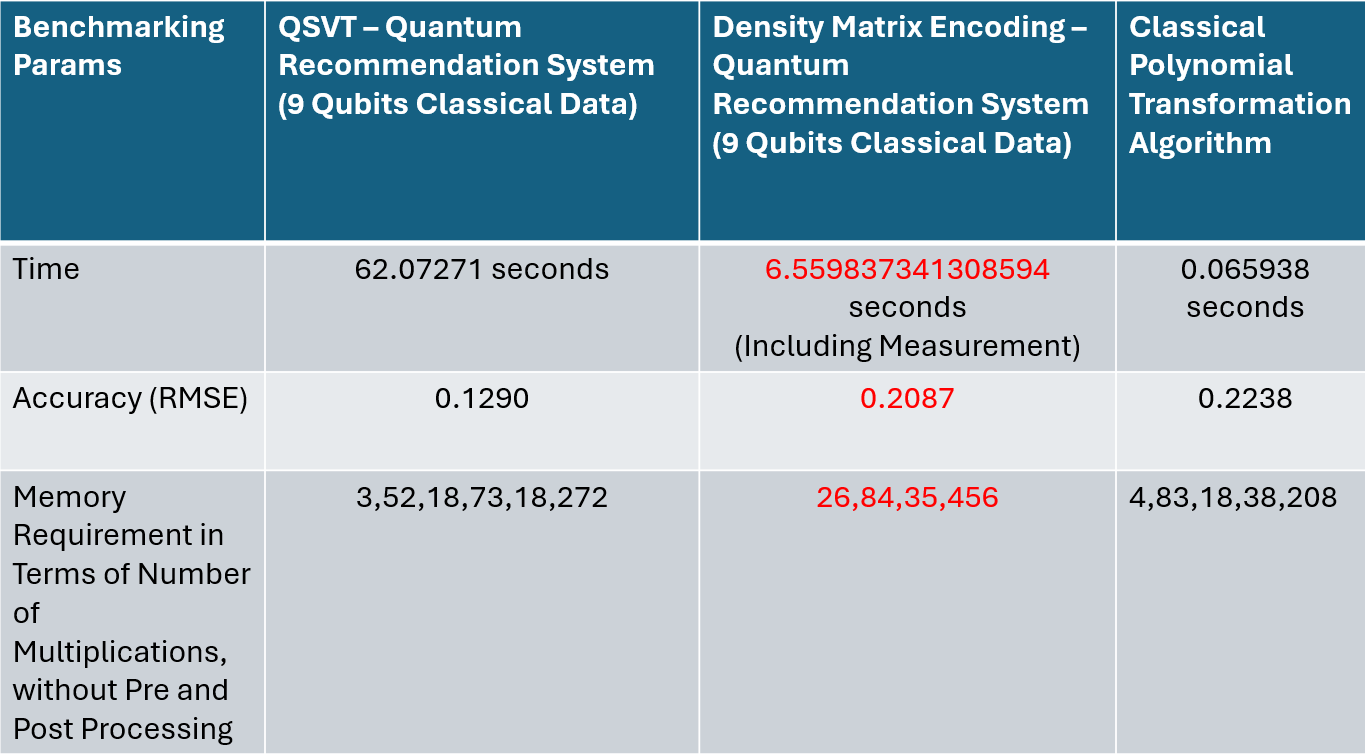

In [19]:
from IPython.display import display
from PIL import Image


path=r"C:\Users\Akshay Patil\Desktop\Advantage of Quantum Density Matrix Encoding and its Deployment over Classical and Other QiML Techniques.png"
display(Image.open(path))